In [2]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import cmocean as cm
import cartopy.crs as ccrs
import cartopy.feature as cft
import sys, os

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client

netcdf_index loaded.


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [3]:
## This is the method we use to get around memory issues. To implement, use:
## dask-scheduler # get the tcp code from this call in a jupyter new terminal, then run command below in a another terminal
## dask-worker tcp://10.0.64.4:8786 --memory-limit 4e9 --nprocs 6 --nthreads 1 --local-directory /local/g40/amh157
client=Client('tcp://10.0.64.9:8786', local_dir='/local/v45/pas561')
client

Client Scheduler: tcp://10.0.64.9:8786 Dashboard: http://10.0.64.9:8787/status,Cluster Workers: 6 Cores: 6 Memory: 24.00 GB


/g/data1/v45/pas561/access-om2_amoc/om2_01_amoc_mask.nc
(1, 2700, 3600)
(2700, 3600)


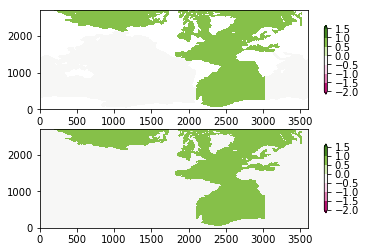

In [4]:
NYFCntrlDir = '/g/data1/v45/pas561/access-om2_amoc/'

Ocean_File = os.path.join(NYFCntrlDir,'om2_01_amoc_mask.nc')
print(Ocean_File)
cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print(cntrl.kmu.shape)
mask=cntrl.kmu[0].load()

plt.subplot(211)
clev = np.arange(-2,2,0.5)
plt.contourf(mask,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)

print(mask.shape)
#print(mask[250,:])

mask=np.nan_to_num(mask)
#print(mask[250,:])

plt.subplot(212)
clev = np.arange(-2,2,0.5)
plt.contourf(mask,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)


In [ ]:
expt = '01deg_jra55v13_iaf'
n_files = None                          ## For Testing
time_units = 'days since 0001-01-01'   ## These are to give correct dates
offset = None

psi = cc.get_nc_variable(expt,'ocean.nc','ty_trans_rho',
                                        n=n_files,time_units=time_units, offset=offset)

psi = psi.resample(time='A').mean('time')

psi=psi*mask

print(psi.shape)


print(' ------ Here is what the initial dataset looks like ------ ')
print(psi)
print(' --------------------------------------------------------- ')
print(' ')

psi = psi.sum('grid_xt_ocean')*1.0e-9
psi = psi.cumsum('potrho') -  psi.sum('potrho')


#print(' ------ Here is what the resampled dataset looks like ------ ')
#print(' --------------------------------------------------------- ')
#print(' ')

## Plot the mean for the North Atlantic region
#psi.mean('time').plot.contourf(levels=np.arange(-29,30,2))

#of=os.path.join('amoc01.npy')
#a=np.save(of,psi)

print(psi.shape)
## Save the whole dataset
#psi.to_netcdf('AMOC_rho_adv_01deg.nc')

Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


In [ ]:
#of=os.path.join('amoc01.npy')
#a=np.save('amoc01_v1.npy',psi[0:10,:,:])

In [ ]:
print(psi.shape)

In [ ]:
#psi.mean('time').plot.contourf(levels=np.arange(-29,30,2))

## Save the whole dataset
psi.to_netcdf('AMOC_rho_adv_01deg.nc')